In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

%matplotlib inline

In [2]:
data=pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_cols = [col for col in data.columns if col not in numerical_cols]
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.astype(str))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


In [5]:
data.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [6]:
data.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

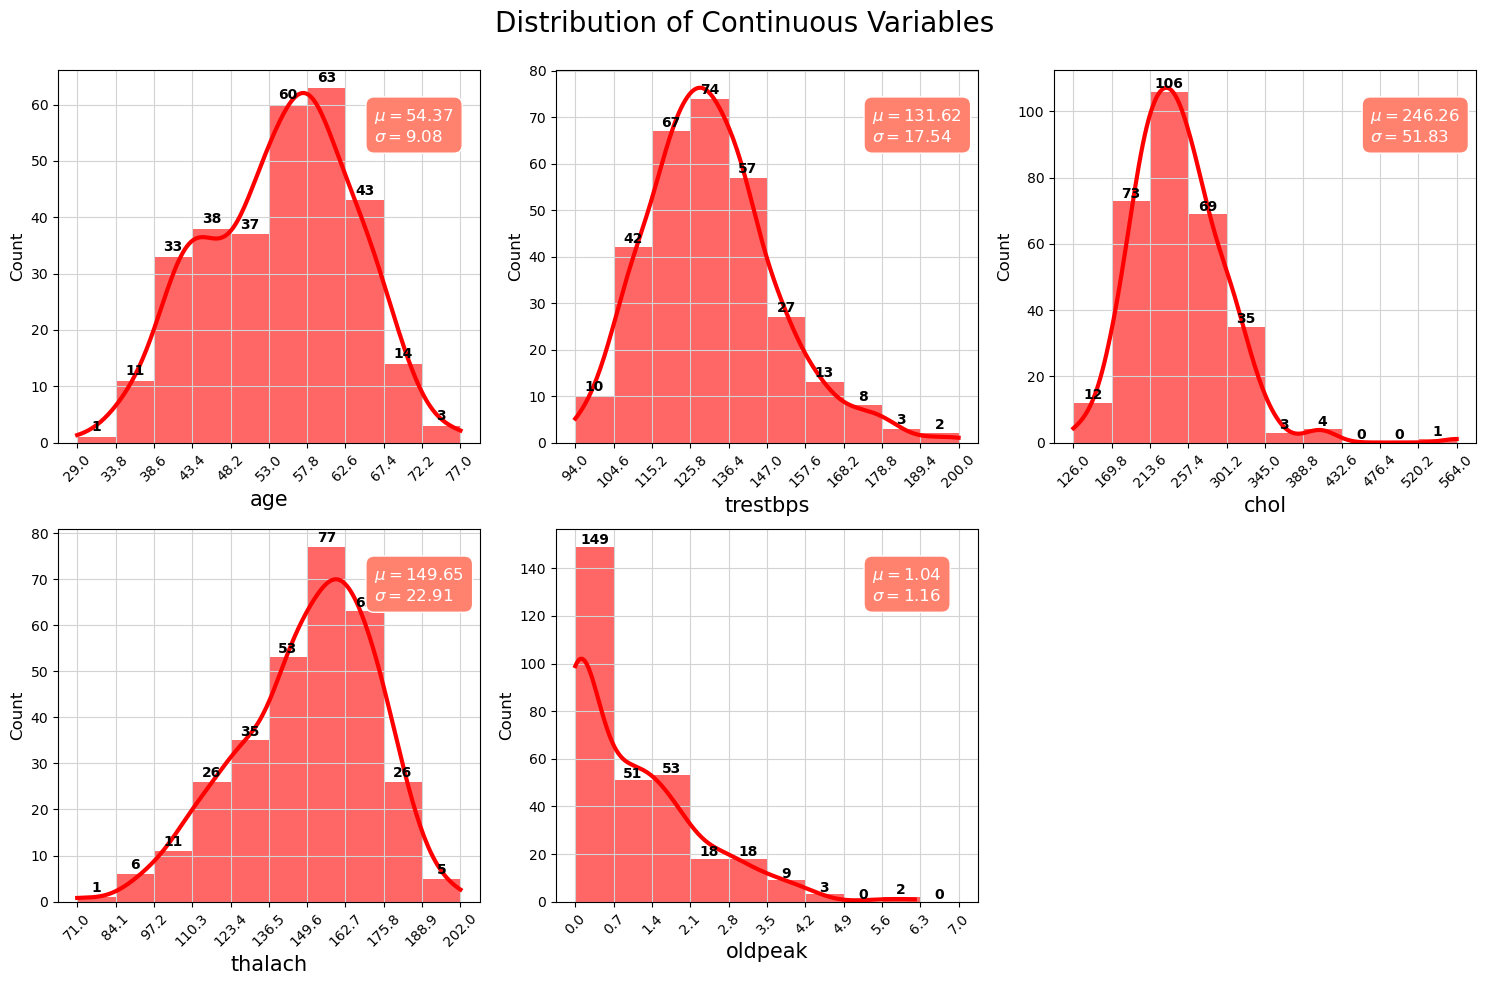

In [7]:
data_continuous = data[numerical_cols]
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for index, column in enumerate(data_continuous.columns):
    row_position = index // 3
    col_position = index % 3
    bin_values, bin_intervals = np.histogram(
        data_continuous[column],
        range=(np.floor(data_continuous[column].min()), 
               np.ceil(data_continuous[column].max()))
    )
    plot_graph = sns.histplot(
        data=data_continuous, x=column, bins=bin_intervals, kde=True,
        ax=axes[row_position, col_position], edgecolor='none', 
        color='red', alpha=0.6, line_kws={'lw': 3}
    )
    axes[row_position, col_position].set_xlabel(column, fontsize=15)
    axes[row_position, col_position].set_ylabel('Count', fontsize=12)
    axes[row_position, col_position].set_xticks(np.round(bin_intervals, 1))
    axes[row_position, col_position].set_xticklabels(axes[row_position, col_position].get_xticks(), rotation=45)
    axes[row_position, col_position].grid(color='lightgrey')

    for bar_index, patch in enumerate(plot_graph.patches):
        axes[row_position, col_position].annotate(
            '{}'.format(patch.get_height()), 
            (patch.get_x() + patch.get_width() / 2, patch.get_height() + 1),
            ha='center', fontsize=10, fontweight="bold"
        )
    
    stats_text = '\n'.join([
        r'$\mu=%.2f$' % data_continuous[column].mean(),
        r'$\sigma=%.2f$' % data_continuous[column].std()
    ])
    
    axes[row_position, col_position].text(
        0.75, 0.9, stats_text, transform=axes[row_position, col_position].transAxes,
        fontsize=12, verticalalignment='top', color='white',
        bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5)
    )
axes[1,2].axis('off')


plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


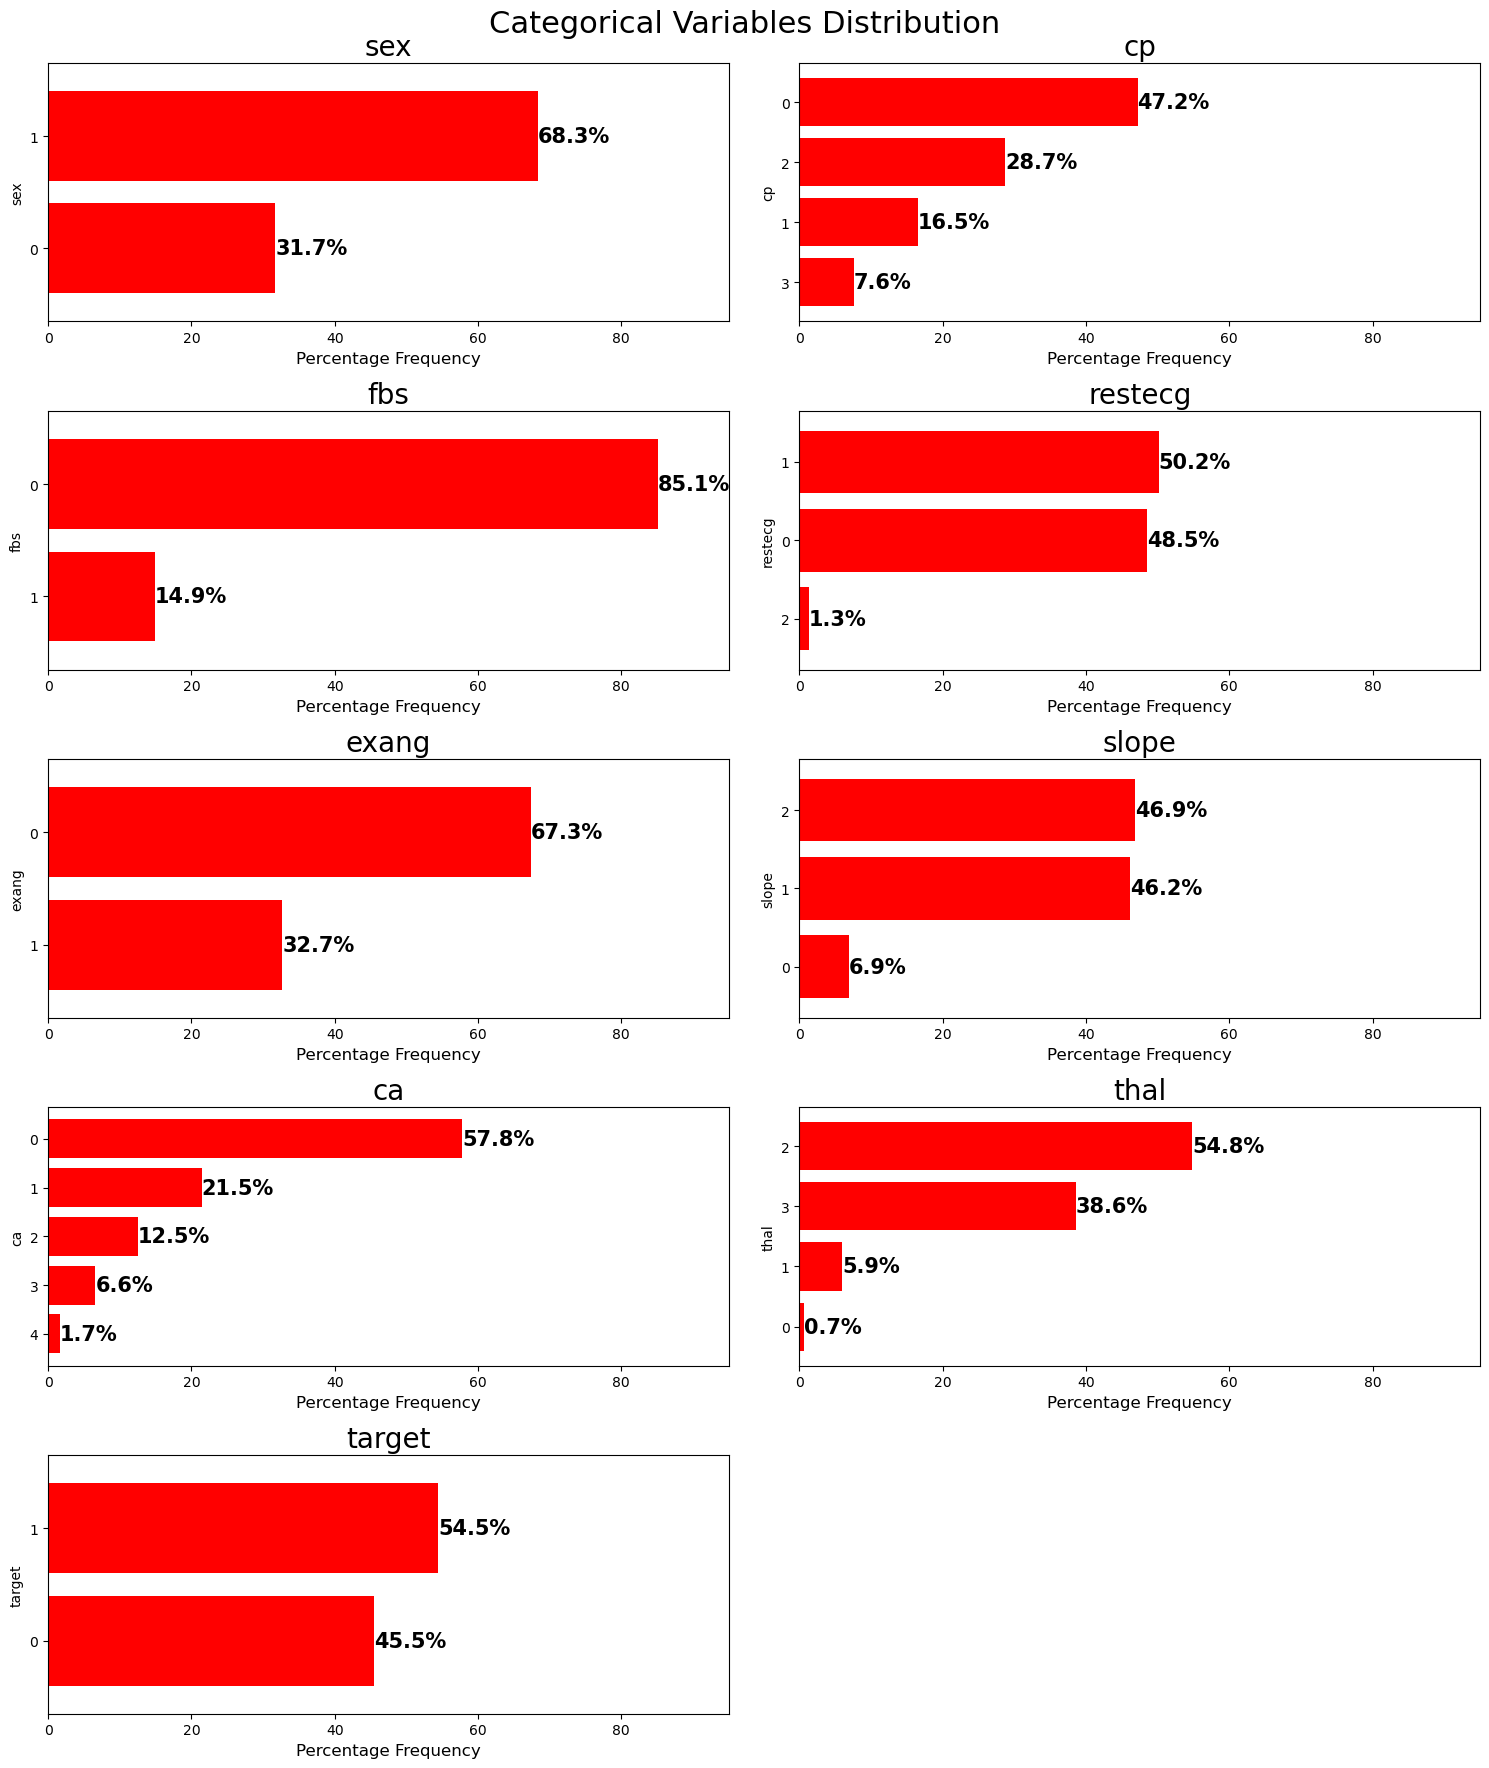

In [8]:
data_categorical = data[categorical_cols]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))
for idx, feature in enumerate(categorical_cols):
    row_idx = idx // 2
    col_idx = idx % 2
    frequency_percent = data_categorical[feature].value_counts(normalize=True) * 100
    frequency_percent = frequency_percent.sort_values()
    frequency_percent.plot(kind='barh', ax=axes[row_idx, col_idx], 
                           width=0.8, color='red')
    for i, val in enumerate(frequency_percent):
        axes[row_idx, col_idx].text(val, i, f'{round(val, 1)}%', 
                                    fontsize=15, fontweight='bold', 
                                    va='center')
    axes[row_idx, col_idx].set_xlim([0, 95])
    axes[row_idx, col_idx].set_xlabel('Percentage Frequency', fontsize=12)
    axes[row_idx, col_idx].set_title(f'{feature}', fontsize=20)
axes[4, 1].axis('off')

plt.suptitle('Categorical Variables Distribution', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


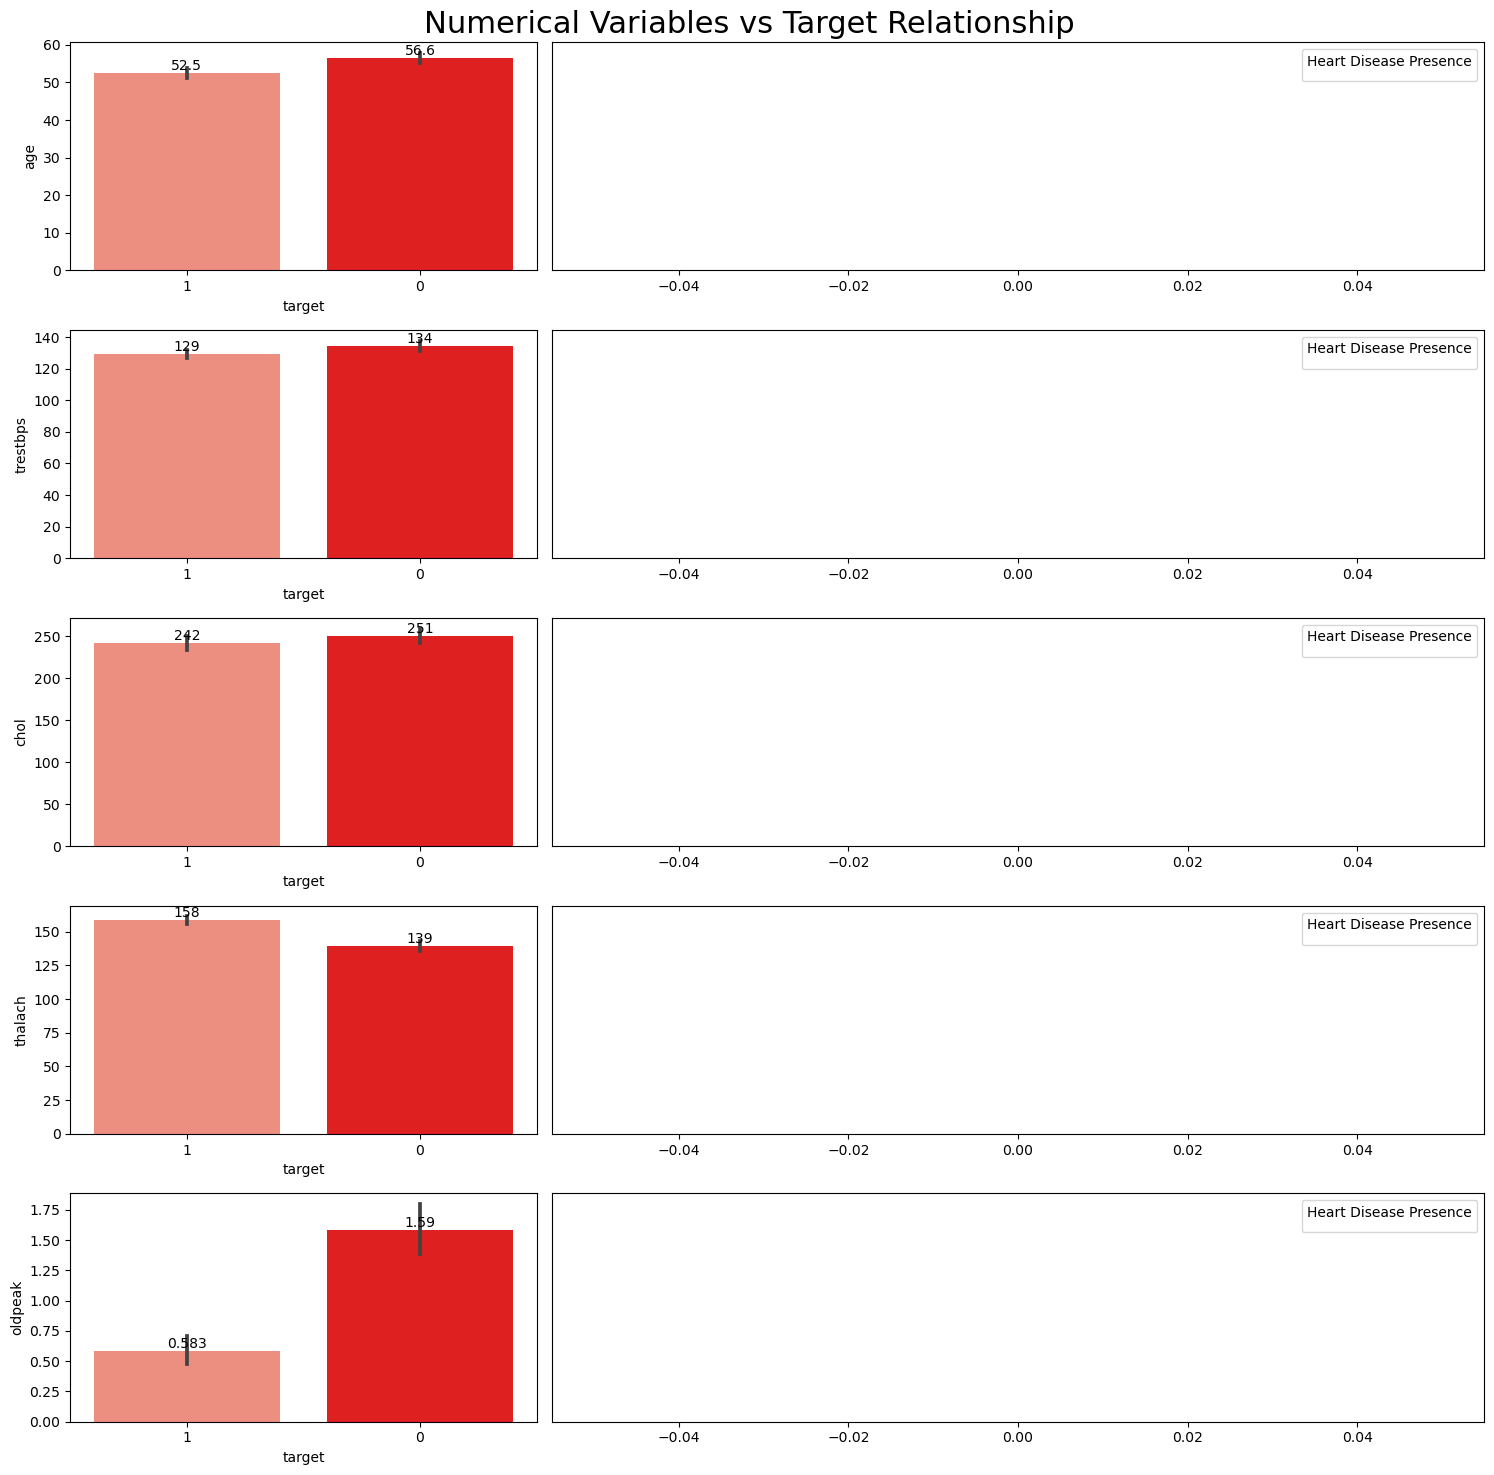

In [9]:
sns.set_palette(['#ff826e', 'red'])
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(15, 15), gridspec_kw={'width_ratios': [1, 2]})
for index, feature in enumerate(numerical_cols):
    chart = sns.barplot(data=data, x="target", y=feature, ax=axes[index, 0])
    sns.kdeplot(data=data[data["target"] == 0], x=feature, fill=True, linewidth=2, ax=axes[index, 1], label='No Disease')
    sns.kdeplot(data=data[data["target"] == 1], x=feature, fill=True, linewidth=2, ax=axes[index, 1], label='Disease')
    axes[index, 1].set_yticks([])
    axes[index, 1].legend(title='Heart Disease Presence', loc='upper right')
    for bars in chart.containers:
        chart.bar_label(bars, fmt='%.3g')

plt.suptitle('Numerical Variables vs Target Relationship', fontsize=22)
plt.tight_layout()
plt.show()

In [10]:
Q1_values = data[numerical_cols].quantile(0.25)
Q3_values = data[numerical_cols].quantile(0.75)
IQR_values = Q3_values - Q1_values
outliers_detected = ((data[numerical_cols] < (Q1_values - 1.5 * IQR_values)) | 
                     (data[numerical_cols] > (Q3_values + 1.5 * IQR_values))).sum()
outliers_detected

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [11]:
one_hot_features = ['cp', 'restecg', 'thal']
integer_features = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
data_encoded = pd.get_dummies(data, columns=one_hot_features, drop_first=True)
for feature in integer_features:
    data_encoded[feature] = data_encoded[feature].astype(int)
data_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1            bool
cp_2            bool
cp_3            bool
restecg_1       bool
restecg_2       bool
thal_1          bool
thal_2          bool
thal_3          bool
dtype: object

In [12]:
data_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,False,False,True,False,False,True,False,False
1,37,1,130,250,0,187,0,3.5,0,0,1,False,True,False,True,False,False,True,False
2,41,0,130,204,0,172,0,1.4,2,0,1,True,False,False,False,False,False,True,False
3,56,1,120,236,0,178,0,0.8,2,0,1,True,False,False,True,False,False,True,False
4,57,0,120,354,0,163,1,0.6,2,0,1,False,False,False,True,False,False,True,False


In [13]:
X_data = data_encoded.drop(columns=['target'])
y_data = data_encoded['target']
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    X_data, y_data, test_size=0.2, random_state=0, stratify=y_data
)

print(X_train_set['oldpeak'].min())

X_train_set['oldpeak'] = X_train_set['oldpeak'] + 0.001
X_test_set['oldpeak'] = X_test_set['oldpeak'] + 0.001


0.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

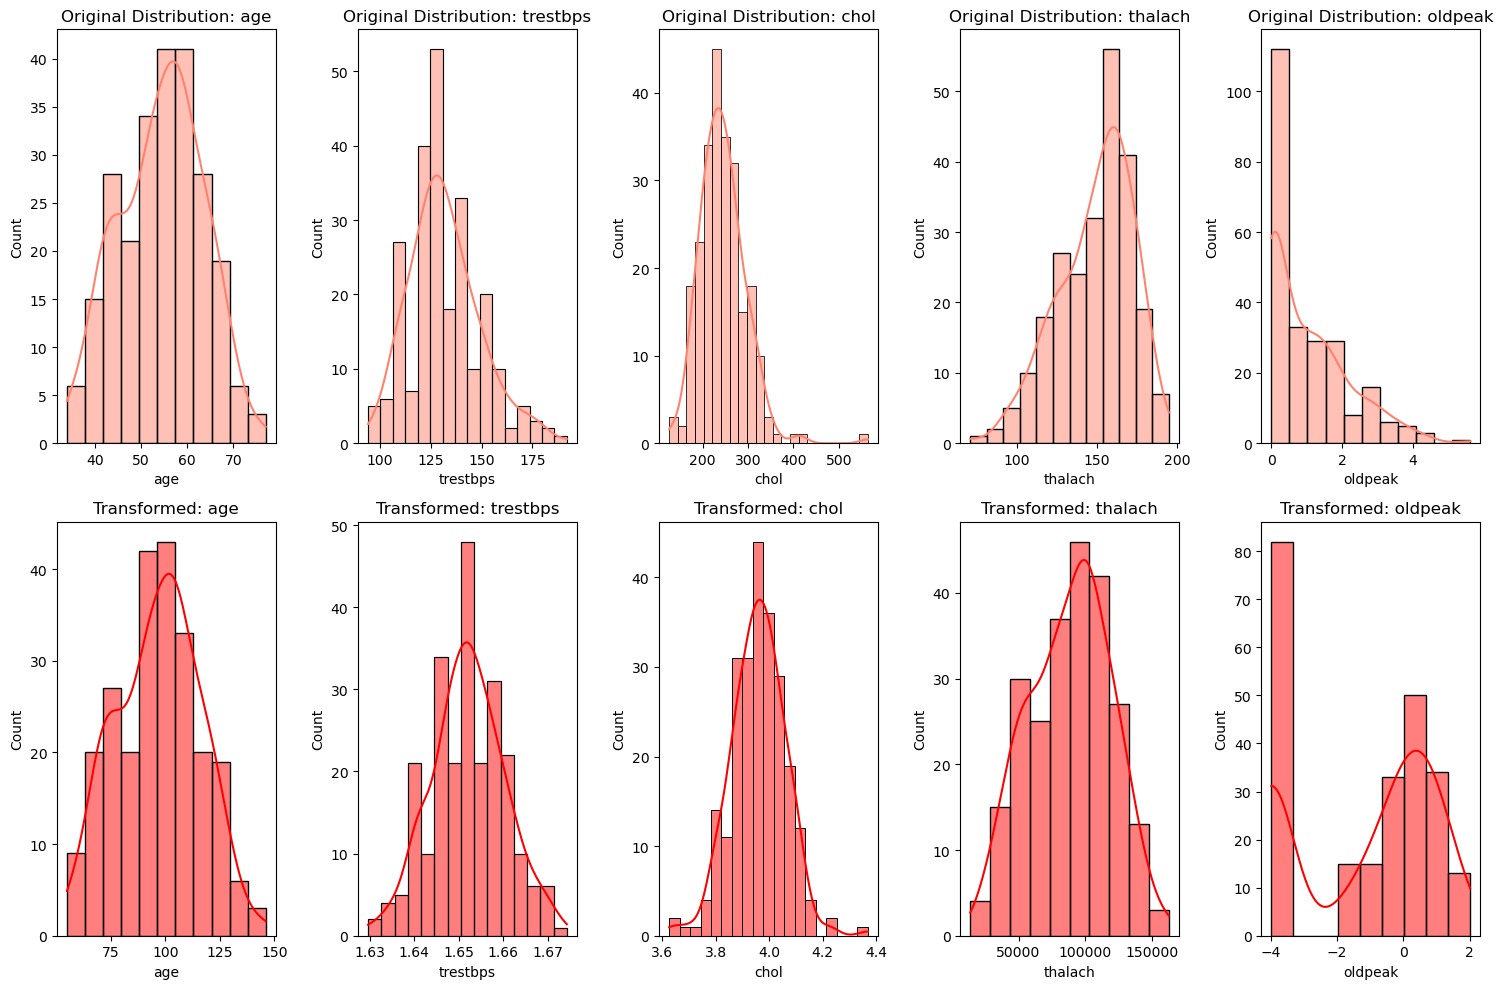

In [14]:
fig, ax = plt.subplots(2, len(numerical_cols), figsize=(15, 10))
lambda_values = {}
for idx, column in enumerate(numerical_cols):
    sns.histplot(X_train_set[column], kde=True, ax=ax[0, idx], color='#ff826e')
    ax[0, idx].set_title(f'Original Distribution: {column}')
    
    if X_train_set[column].min() > 0:
        X_train_set[column], lambda_values[column] = stats.boxcox(X_train_set[column])
        X_test_set[column] = stats.boxcox(X_test_set[column], lmbda=lambda_values[column])
        sns.histplot(X_train_set[column], kde=True, ax=ax[1, idx], color='red')
        ax[1, idx].set_title(f'Transformed: {column}')
    
    else:

        sns.histplot(X_train_set[column], kde=True, ax=ax[1, idx], color='green')
        ax[1, idx].set_title(f'Not Transformed: {column}')

fig.tight_layout()
plt.show()

In [15]:
dt_base = DecisionTreeClassifier(random_state=0)

In [16]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def optimize_hyperparameters(model, param_grid, X_train, y_train, scoring_metric='recall', n_splits=3):
    

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring_metric, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    return grid_search.best_estimator_, best_params


In [17]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [2, 3],               
    'min_samples_split': [2, 3, 4],    
    'min_samples_leaf': [1, 2]        
}

dt_model = DecisionTreeClassifier(random_state=42)
best_dt_model, best_dt_params = optimize_hyperparameters(dt_model, param_grid_dt, X_train_set, y_train_set)
print('最佳决策树超参数:\n', best_dt_params)


最佳决策树超参数:
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [18]:
def tune_hyperparameters(model, param_grid, X_train_set, y_train_set, scoring='recall', n_splits=3):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, n_jobs=-1)
    grid_search.fit(X_train_set, y_train_set)
    
    return grid_search.best_estimator_, grid_search.best_params_
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}
best_dt, best_dt_hyperparams = tune_hyperparameters(dt_base, param_grid_dt, X_train_set, y_train_set)

print("Optimal DT Hyperparameters:", best_dt_hyperparams)

def evaluate_model(model, X_test_set, y_test_set, model_name):
    y_pred = model.predict(X_test_set)
    report = classification_report(y_test_set, y_pred, output_dict=True)

    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test_set, y_pred)
    }

    return pd.DataFrame(metrics, index=[model_name]).round(2)

dt_evaluation = evaluate_model(best_dt, X_test_set, y_test_set, 'Decision Tree')
display(dt_evaluation)

Optimal DT Hyperparameters: {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
Decision Tree,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


In [19]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier())  
])

In [21]:
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)), 
    'knn__weights': ['uniform', 'distance'],  
    'knn__p': [1, 2]
}

best_knn, best_knn_hyperparams = tune_hyperparameters(knn_pipeline, knn_param_grid, X_train_set, y_train_set)
print("KNN Optimal Hyperparameters:", best_knn_hyperparams)
print(classification_report(y_train_set, best_knn.predict(X_train_set)))
print(classification_report(y_test_set, best_knn.predict(X_test_set)))
knn_evaluation = evaluate_model(best_knn, X_test_set, y_test_set, 'KNN')
knn_evaluation

KNN Optimal Hyperparameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


In [22]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC(probability=True)) 
])

In [23]:
param_grid_svm = {
    'svm__C': [0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
    'svm__degree': [2, 3, 4] 
}

best_svm, best_svm_hyperparams = tune_hyperparameters(
    svm_pipeline, param_grid_svm, X_train_set, y_train_set
)

print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.001, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [24]:
print(classification_report(y_train_set, best_svm.predict(X_train_set)))
print(classification_report(y_test_set, best_svm.predict(X_test_set)))
svm_evaluation = evaluate_model(best_svm, X_test_set, y_test_set, 'SVM')
svm_evaluation

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       110
           1       0.69      0.98      0.81       132

    accuracy                           0.75       242
   macro avg       0.83      0.73      0.72       242
weighted avg       0.81      0.75      0.73       242

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        28
           1       0.67      1.00      0.80        33

    accuracy                           0.74        61
   macro avg       0.84      0.71      0.70        61
weighted avg       0.82      0.74      0.71        61



,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,1.0,0.67,0.43,1.0,0.6,0.8,0.84,0.71,0.7,0.74


In [27]:
all_evaluations = [dt_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,1.00,0.67,0.43,1.00,0.60,0.80,0.84,0.71,0.70,0.74
Decision Tree,0.80,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84
